## Exploratory Data Analysis of acoustics and text

In [ ]:
import torch
import librosa
import librosa.display
import torchaudio

import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
IPython.display.Audio("my_audio_file.mp3")

In [3]:
data_dir='MInDS-14'
audio_dir = os.path.join(data_dir, "audio")
text_dir = os.path.join(data_dir, "text")

eng_files=glob.glob(os.path.join(text_dir, "en-*.csv"))
print(f"Found English CSV files: {eng_files}")




Found English CSV files: ['MInDS-14\\text\\en-AU.csv', 'MInDS-14\\text\\en-GB.csv', 'MInDS-14\\text\\en-US.csv']


In [4]:
eng_data=pd.DataFrame()
for csv_file in eng_files:
    lang_code = os.path.basename(csv_file).replace(".csv", "")
    temp_df = pd.read_csv(csv_file)
    temp_df['language'] = lang_code
    eng_data = pd.concat([eng_data, temp_df], ignore_index=True)

eng_data

,filepath,text_asr,text_translated,intent,language
0,en-AU~PAY_BILL/response_4.wav,I would like to pay my electricity bill using ...,I would like to pay my electricity bill using ...,PAY_BILL,en-AU
1,en-AU~PAY_BILL/response_17.wav,hello I like to pay for Bill I would actually ...,hello I like to pay for Bill I would actually ...,PAY_BILL,en-AU
2,en-AU~PAY_BILL/response_16.wav,pay a bill,pay a bill,PAY_BILL,en-AU
3,en-AU~PAY_BILL/response_7.wav,my credit card payment is due,my credit card payment is due,PAY_BILL,en-AU
4,en-AU~PAY_BILL/response_14.wav,hi I would like to make a new payment for a bill,hi I would like to make a new payment for a bill,PAY_BILL,en-AU
...,...,...,...,...,...
1804,en-US~BUSINESS_LOAN/602bac4d963e11ccd901cda8.wav,hi I'm an account holder have been for 18 year...,hi I'm an account holder have been for 18 year...,BUSINESS_LOAN,en-US
1805,en-US~BUSINESS_LOAN/602ba481963e11ccd901cc94.wav,I'm about to make my first payment on my loan ...,I'm about to make my first payment on my loan ...,BUSINESS_LOAN,en-US
1806,en-US~BUSINESS_LOAN/602b98a5963e11ccd901cba2.wav,hi there I'm working about a business loan I w...,hi there I'm working about a business loan I w...,BUSINESS_LOAN,en-US
1807,en-US~BUSINESS_LOAN/602ba84f5f67b421554f643e.wav,hello I would like to take alone,hello I would like to take alone,BUSINESS_LOAN,en-US


In [5]:
print(f"Total English samples: {len(eng_data)}")
print('\nDistribution across English dialects:')
print(eng_data['language'].value_counts())

Total English samples: 1809

Distribution across English dialects:
language
en-AU    654
en-GB    592
en-US    563
Name: count, dtype: int64


In [6]:
eng_data.head()

,filepath,text_asr,text_translated,intent,language
0,en-AU~PAY_BILL/response_4.wav,I would like to pay my electricity bill using ...,I would like to pay my electricity bill using ...,PAY_BILL,en-AU
1,en-AU~PAY_BILL/response_17.wav,hello I like to pay for Bill I would actually ...,hello I like to pay for Bill I would actually ...,PAY_BILL,en-AU
2,en-AU~PAY_BILL/response_16.wav,pay a bill,pay a bill,PAY_BILL,en-AU
3,en-AU~PAY_BILL/response_7.wav,my credit card payment is due,my credit card payment is due,PAY_BILL,en-AU
4,en-AU~PAY_BILL/response_14.wav,hi I would like to make a new payment for a bill,hi I would like to make a new payment for a bill,PAY_BILL,en-AU


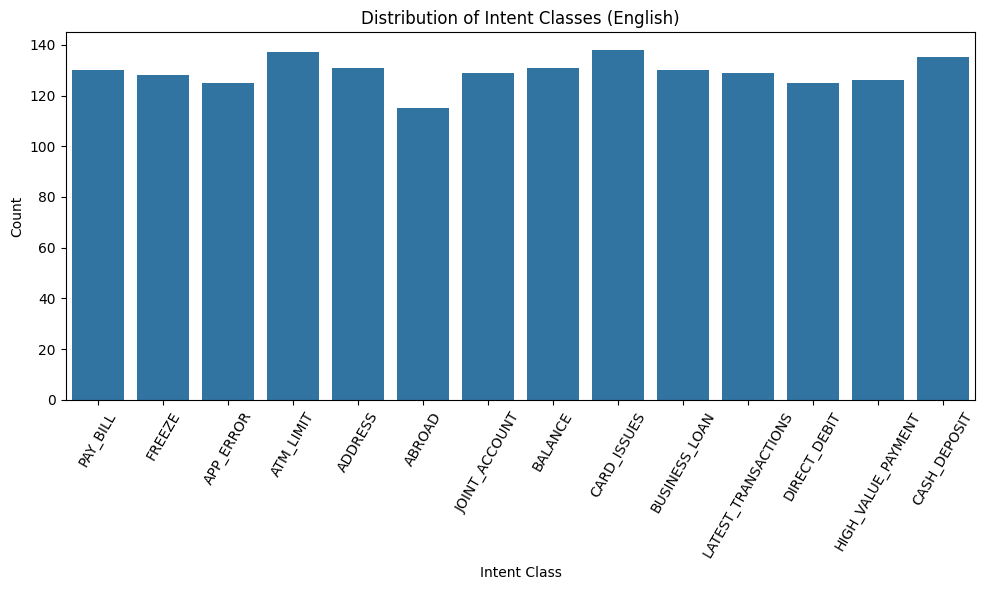

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=eng_data, x='intent')
plt.title('Distribution of Intent Classes (English)')
plt.xlabel('Intent Class')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.tight_layout() 

In [8]:
# Construct full audio paths in df according to directory
eng_data['full_audio_path'] = eng_data['filepath'].apply(
    lambda x: os.path.join(audio_dir, x)
)

sample_row =eng_data.iloc[0]

waveform, sample_rate = torchaudio.load(sample_row['full_audio_path'])
duration = waveform.shape[1] / sample_rate
print(f"Loaded: {sample_row['full_audio_path']}")
print(f"Duration: {duration:.2f}s")
print(f"Sample rate: {sample_rate}Hz")
print(f"Waveform shape: {waveform.shape}")

Loaded: MInDS-14\audio\en-AU~PAY_BILL/response_4.wav
Duration: 7.80s
Sample rate: 8000Hz
Waveform shape: torch.Size([1, 62415])


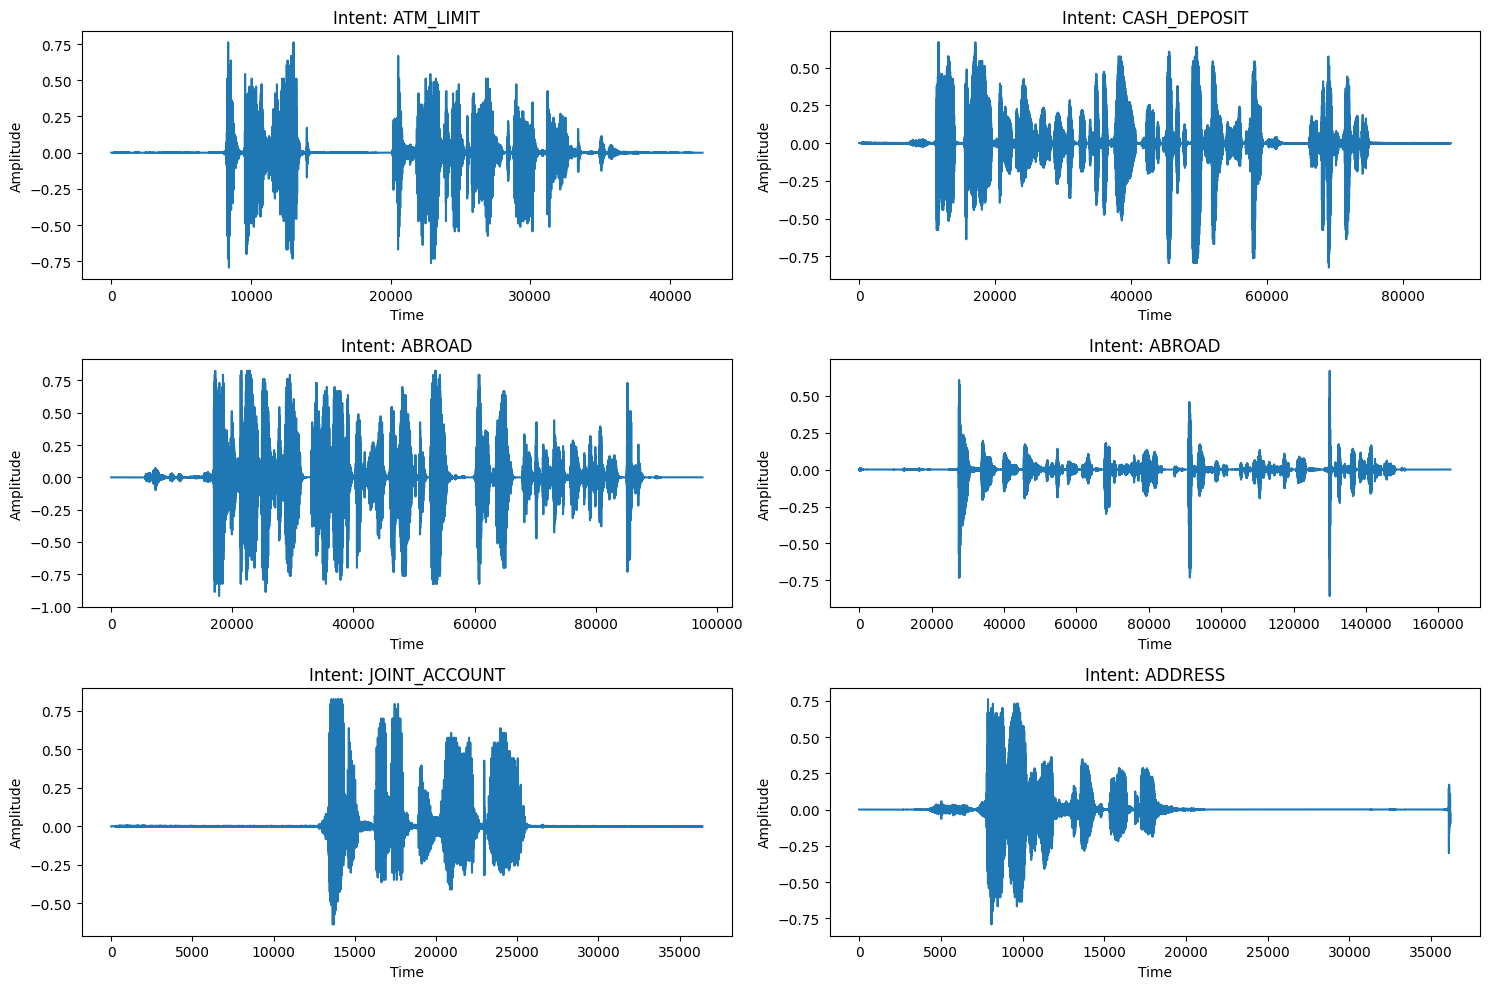

In [9]:
#visualize the waveform
plt.figure(figsize=(15, 10))

sampled_data = eng_data.sample(n=6).reset_index(drop=True)

for i in range(6):
    sample_row = sampled_data.iloc[i]
    waveform, sample_rate = torchaudio.load(sample_row['full_audio_path'])
    
    plt.subplot(3, 2, i + 1)
    plt.plot(waveform[0].numpy())
    plt.title(f"Intent: {sample_row['intent']}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    
plt.show()


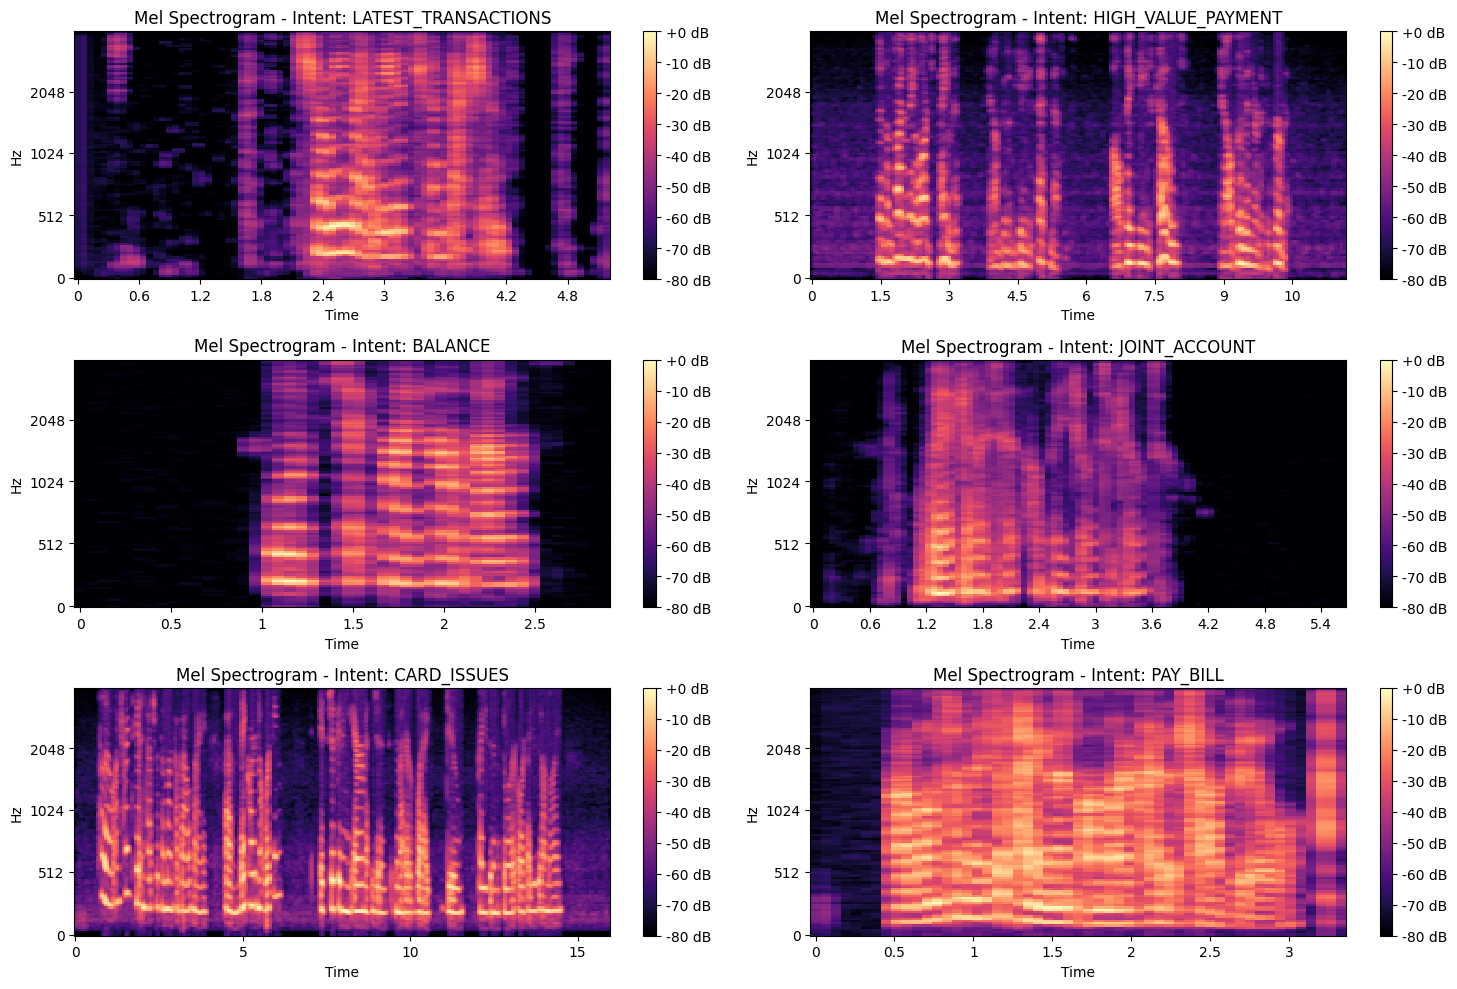

In [10]:
plt.figure(figsize=(15, 10))

sampled_data = eng_data.sample(n=6).reset_index(drop=True)

for i in range(6):
    sample_row = sampled_data.iloc[i]
    waveform, sample_rate = torchaudio.load(sample_row['full_audio_path'])

    # Compute mel spectrogram
    spec = librosa.feature.melspectrogram(y=waveform[0].numpy(), sr=sample_rate)
    spec_db = librosa.power_to_db(spec, ref=np.max)

    # Plot
    plt.subplot(3, 2, i + 1)
    librosa.display.specshow(spec_db, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel Spectrogram - Intent: {sample_row['intent']}")

plt.tight_layout()
plt.show()

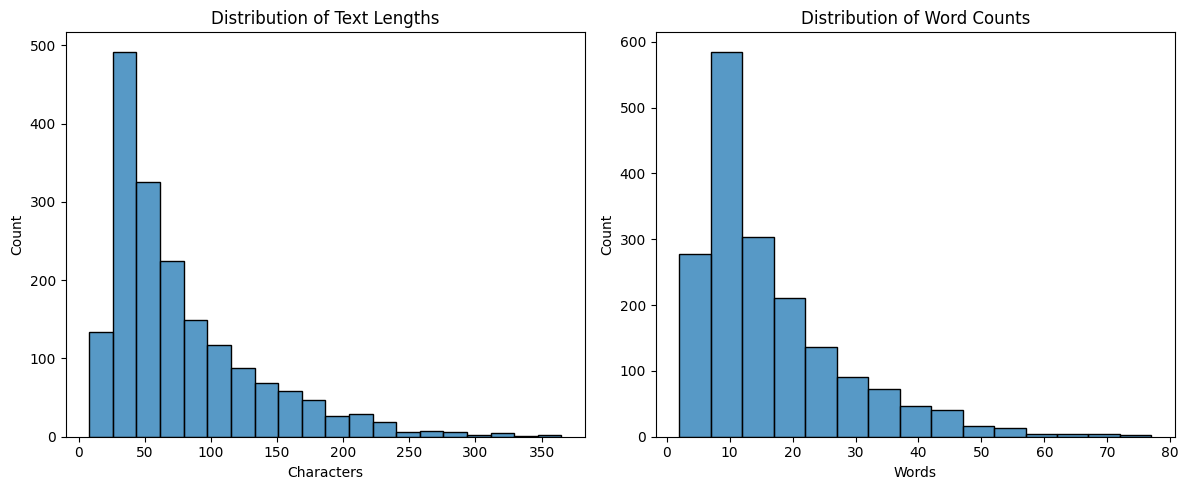

In [11]:
transcription_lengths = eng_data['text_asr'].str.len()
word_counts = eng_data['text_asr'].str.split().str.len()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(transcription_lengths, bins=20)
plt.title('Distribution of Text Lengths')
plt.xlabel('Characters')
plt.subplot(1, 2, 2)
sns.histplot(word_counts, bins=15)
plt.title('Distribution of Word Counts')
plt.xlabel('Words')
plt.tight_layout()

In [12]:
#saving the dataFrame 
os.makedirs("data", exist_ok=True)
eng_data.to_csv("data/eng_data.csv", index=False)